In [1]:
# Kaggle Titanic tutorial with R inspired by Trevor Stephens
# Tutorial part 1

In [40]:
# Import train set and test set
train <- read.csv("train.csv")
test <- read.csv("test.csv")

In [3]:
# Examine structure of data
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [4]:
# Number of people who died and survived
table(train$Survived)


  0   1 
549 342 

In [5]:
# Proportion of number of people who died and survived
prop.table(table(train$Survived))


        0         1 
0.6161616 0.3838384 

In [6]:
# For the first submission, let's just say that everyone died

# Add a Survived column in test set
test$Survived <- rep(0, 418)

# Create a submit dataframe which contains PassengerId and Survived variables
submit <- data.frame(PassengerId=test$PassengerId, Survived=test$Survived)

# Write submit dataframe to csv file
write.csv(submit, file="theyallperished.csv", row.names=FALSE)

In [7]:
# Tutorial part 2 - closer view at genders and age

# Total of females and males
table(train$Sex)


female   male 
   314    577 

In [8]:
# Genders proportion
prop.table(table(train$Sex))


  female     male 
0.352413 0.647587 

In [9]:
# Proportion who died and survived in function of genders
prop.table(table(train$Sex, train$Survived), 1)

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

In [10]:
# We notice that 74.2% of women survived, whereas only 18.9% of men survived
# Let's make a submission in which all women survived

# All women survived
test$Survived[test$Sex == "female"] = 1

# Write new dataframe to a csv file
submit <- data.frame(PassengerId=test$PassengerId, Survived=test$Survived)
write.csv(submit, file="onlywomensurvived.csv", row.names=FALSE)

In [11]:
# Let's see if the age variable has something to offer
summary(train$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

In [12]:
# Create a new variable Child to indicate whether the passenger is below the age of 18
train$Child <- 0
train$Child[train$Age < 18] <- 1

In [13]:
# Number of survivors according to age and sex
aggregate(Survived ~ Child + Sex, data=train, FUN=sum)

Child,Sex,Survived
0,female,195
1,female,38
0,male,86
1,male,23


In [14]:
# Number of people according to age and sex
aggregate(Survived ~ Child + Sex, data=train, FUN=length)

Child,Sex,Survived
0,female,259
1,female,55
0,male,519
1,male,58


In [15]:
# Proportion of people who survived according to age and sex
aggregate(Survived ~ Child + Sex, data=train, FUN=function(x) {sum(x)/length(x)})

Child,Sex,Survived
0,female,0.7528958
1,female,0.6909091
0,male,0.1657033
1,male,0.3965517


In [16]:
# Make bins for the fare variable
train$Fare2 <- "30+"
train$Fare2[train$Fare < 10] <- "<10"
train$Fare2[train$Fare < 20 & train$Fare >= 10] <- "10-20"
train$Fare2[train$Fare < 30 & train$Fare >= 20] <- "20-30"

In [17]:
# Aggregate function proportion of people who survived in function of fare, class and sex
aggregate(Survived ~ Fare2 + Pclass + Sex, data=train, FUN=function(x) {sum(x)/length(x)})

Fare2,Pclass,Sex,Survived
20-30,1,female,0.8333333
30+,1,female,0.9772727
10-20,2,female,0.9142857
20-30,2,female,0.9000000
30+,2,female,1.0000000
<10,3,female,0.5937500
10-20,3,female,0.5813953
20-30,3,female,0.3333333
30+,3,female,0.1250000
<10,1,male,0.0000000


In [18]:
# Number of people who survived according to fare, class and sex
aggregate(Survived ~ Fare2 + Pclass + Sex, data=train, FUN=sum)

Fare2,Pclass,Sex,Survived
20-30,1,female,5
30+,1,female,86
10-20,2,female,32
20-30,2,female,27
30+,2,female,11
<10,3,female,38
10-20,3,female,25
20-30,3,female,7
30+,3,female,2
<10,1,male,0


In [19]:
# Number of people according to fare, class and sex
aggregate(Survived ~ Fare2 + Pclass + Sex, data=train, FUN=length)

Fare2,Pclass,Sex,Survived
20-30,1,female,6
30+,1,female,88
10-20,2,female,35
20-30,2,female,30
30+,2,female,11
<10,3,female,64
10-20,3,female,43
20-30,3,female,21
30+,3,female,16
<10,1,male,6


In [20]:
# Create new submit file in which all women survived but women with class 3 and fare <= 20
test$Survived <- 0
test$Survived[test$Sex == "female"] <- 1
test$Survived[test$Sex == "female" & test$Pclass == 3 & test$Fare >= 20] <- 0

submit <- data.frame(PassengerId=test$PassengerId, Survived=test$Survived)
write.csv(submit, file="mostwomensurvived.csv", row.names=FALSE)

In [21]:
# Tutorial part 3 - Decision trees

# Load rpart package
library(rpart)

In [22]:
# Call the decision tree fit
fit <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
             data=train,
             method="class")

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


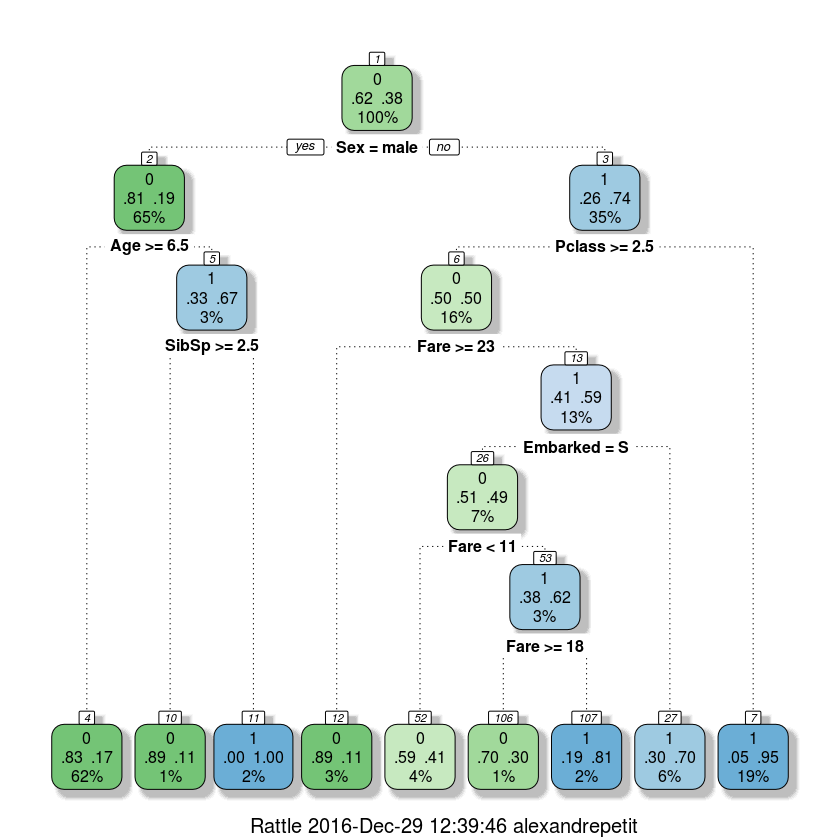

In [23]:
# Examine decision tree fit
library(rattle)
library(rpart.plot)
library(RColorBrewer)

fancyRpartPlot(fit)

In [24]:
# Make prediction based on decision tree
prediction <- predict(fit, test, type="class")

In [26]:
# Write prediction to csv file
submit <- data.frame(PassengerId=test$PassengerId, Survived=prediction)
write.csv(submit, file="decisiontreemodel.csv", row.names=FALSE)

In [34]:
# Modify fit to control minsplit and cp
fit.new <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
             data=train,
             method="class",
             control=rpart.control(minsplit=2, cp=0))

In [36]:
# New prediction according to new fit
prediction.new <- predict(fit.new, test, type="class")

In [38]:
# Write new prediction to csv file
submit <- data.frame(PassengerId=test$PassengerId, Survived=prediction.new)
write.csv(submit, file="newdecisiontreemodel.csv", row.names=FALSE)

In [47]:
# Tutorial part 4 - feature engineering

# Prepare table to extract name title
test$Survived <- NA
combi <- rbind(train, test)
combi$Name <- as.character(combi$Name)
combi$Name[1]

[1] "Braund, Mr. Owen Harris"

In [48]:
strsplit(combi$Name[1], "[,.]")

[[1]]
[1] "Braund"       " Mr"          " Owen Harris"

In [49]:
strsplit(combi$Name[1], "[,.]")[[1]]

[1] "Braund"       " Mr"          " Owen Harris"

In [50]:
# Extract name title
strsplit(combi$Name[1], "[,.]")[[1]][2]

[1] " Mr"

In [53]:
# Get name title of every row and store it
combi$Title <- sapply(combi$Name, FUN=function(x) { strsplit(x, split="[,.]")[[1]][2] })

In [55]:
# Strip unneeded spaces
combi$Title <- sub(" ", "", combi$Title)

In [61]:
# Examine name titles
table(combi$Title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

In [62]:
# Combine rare but similar titles
combi$Title[combi$Title %in% c("Mme", "Mlle")] <- "Mlle"
combi$Title[combi$Title %in% c("Capt", "Don", "Major", "Sir")] <- "Sir"
combi$Title[combi$Title %in% c("Dona", "Lady", "the Countess", "Jonkheer")] <- "Lady"
combi$Title <- factor(combi$Title)

In [63]:
# Get family size
combi$FamilySize <- combi$SibSp + combi$Parch + 1

In [65]:
# Get surname
combi$Surname <- sapply(combi$Name, FUN=function(x) {strsplit(x, split="[,.]")[[1]][1]})

In [66]:
# Create family ID
combi$FamilyID <- paste(as.character(combi$FamilySize), combi$Surname, sep="")

In [68]:
# Group together under the term Small families of less than 3 members
combi$FamilyID[combi$FamilySize <= 2] <- "Small"

In [72]:
# Store family IDs in a data frame
famIDs <- data.frame(table(combi$FamilyID))

In [73]:
# Fix some mistaken IDs
famIDs <- famIDs[famIDs$Freq <= 2,]
combi$FamilyID[combi$FamilyID %in% famIDs$Var1] <- "Small"
combi$FamilyID <- factor(combi$FamilyID)

In [74]:
# Train model
train <- combi[1:891,]
test <- combi[892:1309,]
fit <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + FamilySize + FamilyID,
             data=train, 
             method="class")

In [75]:
# New prediction according to new fit
prediction <- predict(fit, test, type="class")

# Write new prediction to csv file
submit <- data.frame(PassengerId=test$PassengerId, Survived=prediction)
write.csv(submit, file="decisiontreemodelwithfe.csv", row.names=FALSE)